In [ ]:
¼import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("/content/drive/MyDrive/Competitions/KDAG (1)/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Competitions/KDAG (1)/test.csv")

In [ ]:
for col in ['location', 'sub-class']:
  valDict = train[col].value_counts().to_dict()
  num=0
  for i in valDict:
    valDict[i] = numj num+=1
  
  train[col] = train[col].map(valDict)
train

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,2,kariox,Consumer,1,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,2,kariox,Consumer,0,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,2,qexty,Consumer,2,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,2,kariox,Consumer,5,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,2,kariox,Consumer,4,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,6696,Burlington,0.0,542.940,3,1,kariox,Consumer,8,Standard Class,9389,152.0232,2021-01-01,5408,Vermont,2021-01-01
6696,6697,San Jose,0.2,276.784,2,0,kariox,Corporate,0,Standard Class,9597,89.9548,2021-01-01,95123,California,2021-01-01
6697,6698,Burlington,0.0,2.040,1,1,kariox,Consumer,11,Standard Class,9390,0.9588,2021-01-01,5408,Vermont,2021-01-01
6698,6699,New York City,0.1,207.846,3,1,qexty,Corporate,7,Second Class,440,2.3094,2021-01-01,10024,New York,2021-01-01


In [ ]:
for col in ['location', 'sub-class']:
  valDict = test[col].value_counts().to_dict()
  num=0
  for i in valDict:
    valDict[i] = num
    num+=1
  
  test[col] = test[col].map(valDict)
test

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,delivery date,address code,departure state,placement date
0,6701,San Francisco,0.0,24.200,5,0,kariox,Consumer,5,Standard Class,2408,2021-01-01,94122,California,2021-01-01
1,6702,San Francisco,0.2,359.976,3,0,fynota,Consumer,3,Standard Class,2409,2021-01-01,94122,California,2021-01-01
2,6703,Waterbury,0.0,3.520,2,1,kariox,Consumer,5,Standard Class,5425,2021-01-01,6708,Connecticut,2021-01-01
3,6704,Chicago,0.2,11.520,5,2,kariox,Consumer,9,First Class,7408,2021-01-01,60653,Illinois,2021-01-01
4,6705,Seattle,0.0,242.940,3,0,kariox,Home Office,4,Standard Class,733,2021-01-01,98115,Washington,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,9990,New York City,0.0,31.920,4,1,kariox,Consumer,4,Second Class,1171,2021-12-01,10035,New York,2021-12-01
3290,9991,New York City,0.0,19.440,3,1,kariox,Consumer,1,Second Class,1170,2021-12-01,10035,New York,2021-12-01
3291,9992,New York City,0.0,272.940,3,1,kariox,Consumer,4,Second Class,1169,2021-12-01,10035,New York,2021-12-01
3292,9993,San Francisco,0.2,113.568,2,0,qexty,Consumer,7,Standard Class,414,2021-12-01,94110,California,2021-12-01


In [ ]:
train['coeff'] = train['profit']/train['price']

In [ ]:
X = train[['discount', 'price', 'sub-class', 'location']].to_numpy()
y = train['coeff'].to_numpy()
z = train['profit'].to_numpy()

from sklearn.utils import shuffle
X,y,z = shuffle(X,y,z)

In [ ]:
Xtest = test[['discount', 'price', 'sub-class', 'location']].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
X, Xval,y, yval,z, zval = train_test_split(X,y,z)
X.shape, Xval.shape, y.shape, yval.shape, z.shape, zval.shape

((5025, 4), (1675, 4), (5025,), (1675,), (5025,), (1675,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scl1 = StandardScaler()
X = scl1.fit_transform(X)
Xtest = scl1.transform(Xtest)
Xval = scl1.transform(Xval)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=2, min_samples_leaf=10)

from sklearn.model_selection import cross_validate
cvr = cross_validate(dtr, X, y, cv=6, return_train_score=True, n_jobs=6)
cvr['train_score'], cvr['test_score']

(array([0.84565745, 0.84036053, 0.83986862, 0.83246568, 0.84207006,
        0.83946266]),
 array([0.80828547, 0.83675378, 0.84010919, 0.8687987 , 0.82947372,
        0.84207863]))

In [ ]:
dtr.fit(X,y)
yvalpreds = dtr.predict(Xval)
ytestpreds = dtr.predict(Xtest)

from sklearn.metrics import r2_score
r2_score(yval, yvalpreds)

0.84119209051179

In [ ]:
X2 = np.ndarray((X.shape[0],1))
X2[:,0] = X[:,1]*y

X2val = np.ndarray((Xval.shape[0],1))
X2val[:,0] = Xval[:,1]*yvalpreds

X2test = np.ndarray((Xtest.shape[0],1))
X2test[:,0] = Xtest[:,1]*ytestpreds

scl2 = StandardScaler()
X2 = scl2.fit_transform(X2)
X2val = scl2.transform(X2val)
X2test = scl2.transform(X2test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.model_selection import cross_validate
cvr = cross_validate(lr, X2, z, cv=6, return_train_score=True, n_jobs=6)
cvr['train_score'], cvr['test_score']

(array([0.75177426, 0.8138243 , 0.7921005 , 0.83373507, 0.8325878 ,
        0.8164447 ]),
 array([0.9062407 , 0.78451915, 0.86326073, 0.52214513, 0.28682303,
        0.76917705]))

In [ ]:
lr.fit(X2,z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

-1.3942572257326917


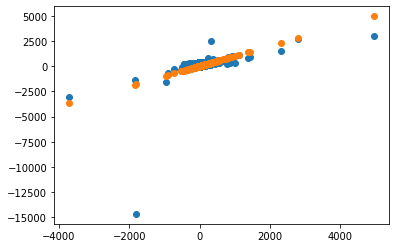

In [ ]:
zvalpreds = lr.predict(X2val)
print(r2_score(zval, zvalpreds))
plt.scatter(zval,zvalpreds)
plt.scatter(zval,zval)

In [ ]:
ztestpreds = lr.predict(X2test)

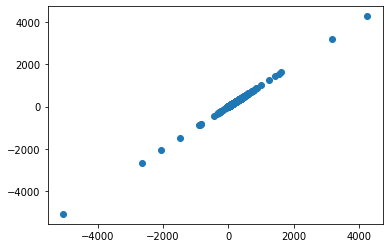

In [ ]:
plt.scatter(ztestpreds,ztestpreds)

In [ ]:
res = pd.DataFrame({'id':test['id'], 'profit':ztestpreds})
res

,id,profit
0,6701,-34.121851
1,6702,45.561385
2,6703,-40.474756
3,6704,1.459189
4,6705,33.075170
...,...,...
3289,9990,-31.750264
3290,9991,-35.584125
3291,9992,42.291183
3292,9993,14.374854


In [ ]:
#res.to_csv("/content/drive/MyDrive/Competitions/KDAG (1)/result2.csv", index=False)